In [1]:
# 데이터 불러오기
stats = pd.read_csv("./charcters_stats.csv")
stats.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
0,3-D Man,good,50,31,43,32,25,52,233
1,A-Bomb,good,38,100,17,80,17,64,316
2,Abe Sapien,good,88,14,35,42,35,85,299
3,Abin Sur,good,50,90,53,64,84,65,406
4,Abomination,bad,63,80,53,90,55,95,436


# Core Mission

## 1. 캐릭터 능력치 수치의 합이 가장 큰 캐릭터 찾기

idxmax를 이용해 한 번에 찾아낼 수 있다.

In [2]:
stats.loc[stats["Total"].idxmax(), "Name"]

'Martian Manhunter'

하지만 동점자가 있을 수 있으므로, Total을 기준으로 정렬하여 보기로 함

In [3]:
stats_sorted = stats.sort_values(by="Total", ascending=False)
stats_sorted.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total
361,Martian Manhunter,good,100,100,96,100,100,85,581
242,General Zod,bad,94,100,96,100,94,95,579
535,Superboy-Prime,bad,94,100,100,100,100,85,579
537,Superman,good,100,100,100,100,94,85,579
16,Amazo,bad,75,100,100,100,100,100,575


동점자는 없고, 가장 능력치 수치의 합이 높은 캐릭터는 "Martian Manhunter"이다.  
잘생겼네

## 2. 좋은 캐릭터와 나쁜 캐릭터들의 능력치 수치 분포 보이기

In [6]:
stats_gb = stats[stats["Alignment"] != "neutral"]

### 단순히 수로만 비교해보기

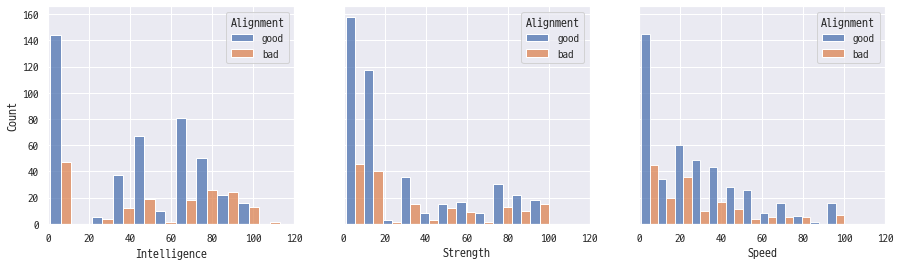

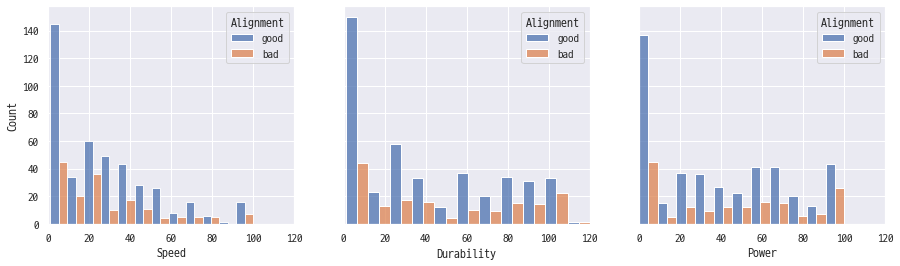

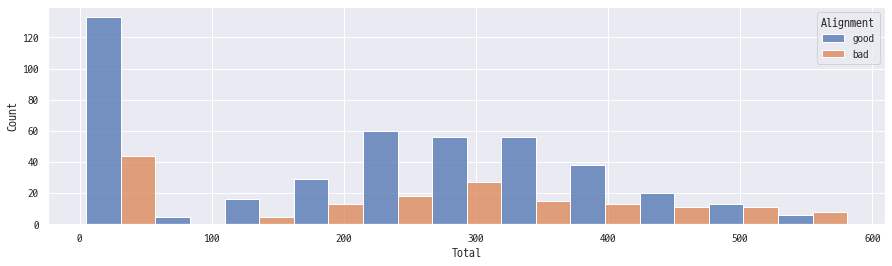

In [85]:
x_vars = stats_gb.columns[2:-1]

for i in range(2):
    fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15, 4))
    for j in range(3):
        sns.histplot(x=x_vars[i * 2 + j], hue="Alignment", multiple="dodge", stat="count", ax=ax[j], data=stats_gb)
        ax[j].set_xlim([0, 120])

plt.figure(figsize=(15, 4))
sns.histplot(x="Total", hue="Alignment", multiple="dodge", stat="count", data=stats_gb)
plt.show()

### 비율로 보기

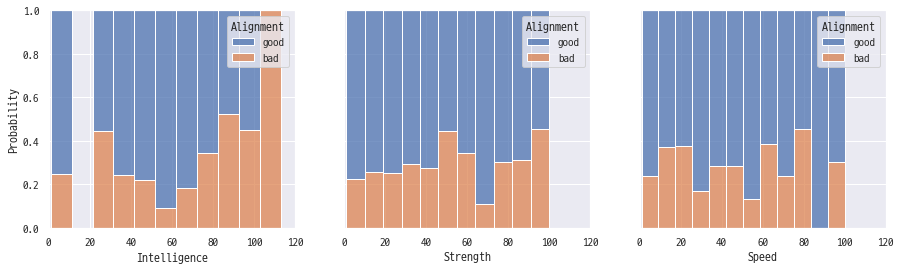

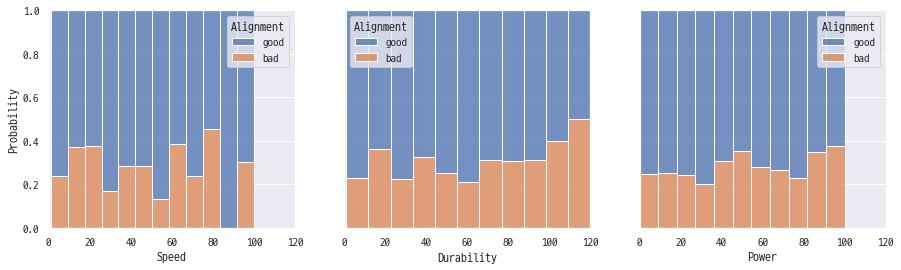

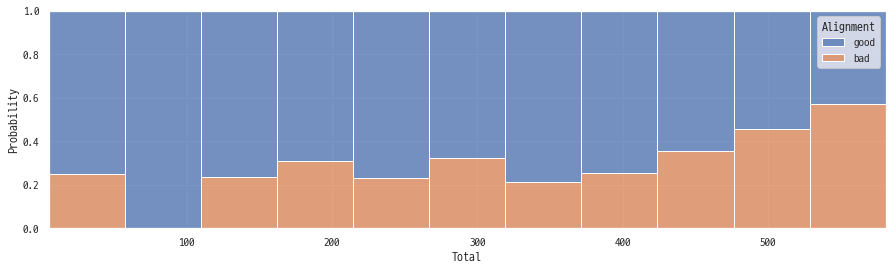

In [90]:
x_vars = stats_gb.columns[2:-1]

for i in range(2):
    fig, ax = plt.subplots(1, 3, sharey=True, figsize=(15, 4))
    for j in range(3):
        sns.histplot(x=x_vars[i * 2 + j], hue="Alignment", multiple="fill", stat="probability", ax=ax[j], data=stats_gb)
        ax[j].set_xlim([0, 120])

plt.figure(figsize=(15, 4))
sns.histplot(x="Total", hue="Alignment", multiple="fill", stat="probability", data=stats_gb)
plt.show()

# Extra Mission

## 1. 어떤 코믹스 회사의 캐릭터들이 능력치 합의 평균이 가장 큰가?

In [91]:
# 데이터 불러오기
info = pd.read_csv("./marvel_characters_info.csv", usecols=["Name", "Publisher"])
info.head()

,Name,Publisher
0,A-Bomb,Marvel Comics
1,Abe Sapien,Dark Horse Comics
2,Abin Sur,DC Comics
3,Abomination,Marvel Comics
4,Abraxas,Marvel Comics


In [92]:
joined = pd.merge(stats, info, on="Name")
joined.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Publisher
0,A-Bomb,good,38,100,17,80,17,64,316,Marvel Comics
1,Abe Sapien,good,88,14,35,42,35,85,299,Dark Horse Comics
2,Abin Sur,good,50,90,53,64,84,65,406,DC Comics
3,Abomination,bad,63,80,53,90,55,95,436,Marvel Comics
4,Abraxas,bad,88,100,83,99,100,56,526,Marvel Comics


In [97]:
joined2 = joined.groupby("Publisher")["Total"].mean().sort_values(ascending=False)
joined2

Publisher
Shueisha             481.500000
Microsoft            425.000000
Sony Pictures        398.000000
DC Comics            253.436047
Marvel Comics        243.851003
Universal Studios    237.000000
Dark Horse Comics    196.875000
SyFy                 188.800000
ABC Studios          166.000000
Icon Comics          148.000000
NBC - Heroes         140.526316
Image Comics          70.615385
Hanna-Barbera          5.000000
HarperCollins          5.000000
Team Epic TV           5.000000
Wildstorm              5.000000
Name: Total, dtype: float64

가장 능력치 평균이 큰 회사는 "Shueisha"이다.  
두번째는 마이크로소프트?

## 2. 둘이 싸운다.

In [115]:
power = stats.groupby("Alignment")["Total"].mean()
power

Alignment
bad        247.212121
good       214.990741
neutral    355.363636
Name: Total, dtype: float64

good 진영이 약하다. 그러므로 중립 진영은 good의 편에 설 것이다.

In [117]:
good = stats[stats["Alignment"] != "bad"]
good_power = good["Total"].sum() / good.shape[0]

print(f"good = {good_power}")
print(f"bad = {power['bad']}")

good = 218.49551569506727
bad = 247.21212121212122


중립영웅이 합류했지만 그래도 bad 영웅들이 이긴다.

## 3. 추가 과제

뚜벅이 영웅은 날개달린 영웅보다 평균적으로 더 강해야 할 것이다. 그래야 밸런스가 맞으니까. 궁금하지 않습니까?

In [118]:
ability = pd.read_csv("./superheroes_power_matrix.csv", usecols=["Name", "Flight"])
ability.head()

,Name,Flight
0,3-D Man,False
1,A-Bomb,False
2,Abe Sapien,False
3,Abin Sur,False
4,Abomination,False


In [122]:
ability["Flight"].sum()

212

In [123]:
joined2 = pd.merge(stats, ability, on="Name")
joined2.head()

,Name,Alignment,Intelligence,Strength,Speed,Durability,Power,Combat,Total,Flight
0,3-D Man,good,50,31,43,32,25,52,233,False
1,A-Bomb,good,38,100,17,80,17,64,316,False
2,Abe Sapien,good,88,14,35,42,35,85,299,False
3,Abin Sur,good,50,90,53,64,84,65,406,False
4,Abomination,bad,63,80,53,90,55,95,436,False


In [127]:
joined2.groupby("Flight")["Total"].mean()

Flight
False    231.671512
True     309.114286
Name: Total, dtype: float64

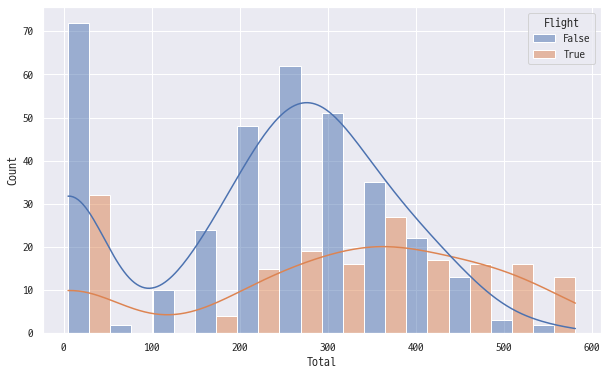

In [135]:
plt.figure(figsize=(10, 6))
sns.histplot(x="Total", hue="Flight", multiple="dodge", kde=True, data=joined2)
plt.show()

가정은 틀렸다. 날개달린 영웅들이 평균적으로 더 강하다.